# 安然POI识别 —— 工作流

### 加载模块

In [1]:
import pickle

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data, test_classifier

/Users/xin/anaconda/envs/py2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 数据探索

In [168]:
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

data_df = pd.DataFrame(data_dict).T
data_df.replace('NaN', np.nan, inplace=True)
data_df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,NaN,178980.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0
BANNANTINE JAMES M,NaN,NaN,-5104.0,NaN,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,...,NaN,864523.0,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,1586055.0,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,NaN,frank.bay@enron.com,NaN,129142.0,NaN,NaN,NaN,...,NaN,69.0,False,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0
BAZELIDES PHILIP J,NaN,684694.0,NaN,NaN,NaN,1599641.0,NaN,NaN,NaN,NaN,...,93750.0,874.0,False,NaN,NaN,80818.0,NaN,NaN,860136.0,1599641.0
BECK SALLY W,700000.0,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172.0,4343.0,144.0,386.0,...,NaN,566.0,False,126027.0,NaN,231330.0,2639.0,7315.0,969068.0,126027.0
BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,...,NaN,210698.0,True,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
BELFER ROBERT,NaN,-102500.0,NaN,3285.0,NaN,3285.0,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093.0,NaN,NaN,NaN,102500.0,-44093.0
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396.0,11892.0,NaN,NaN,NaN,...,NaN,NaN,False,869220.0,NaN,216582.0,NaN,NaN,228474.0,2493616.0


In [169]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                111 non-null object
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        93 non-null float64
poi                          146 non-null bool
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt_with_poi      86 non-null float64

POI人数

In [5]:
sum(data_df.poi == True)

18

### 移除异常值

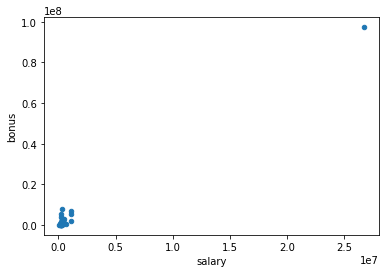

In [6]:
_ = data_df.plot('salary', 'bonus', kind='scatter')

In [7]:
data_df.bonus.idxmax()

'TOTAL'

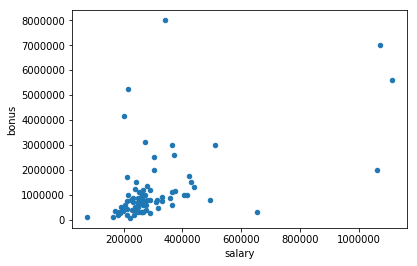

In [170]:
data_df.drop('TOTAL', inplace=True)
_ = data_df.plot('salary', 'bonus', kind='scatter')

In [5]:
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
        
data_dict.pop('TOTAL', 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

### 创建新的特征

In [136]:
def calc_ratio(x, y):
    if x == 'NaN' or y == 'NaN':
        return 'NaN'
    else:
        return float(x) / float(y)
    
    
def calc_log(x):
    if x == 'NaN' or float(x) <= 0:
        return 'NaN'
    else:
        return np.log(float(x))


for name, fea in data_dict.items():
    fea['ratio_from_poi'] = calc_ratio(fea['from_poi_to_this_person'], fea['to_messages'])
    fea['ratio_to_poi'] = calc_ratio(fea['from_this_person_to_poi'], fea['from_messages']) 
    fea['log_salary'] = calc_log(fea['salary'])
    fea['log_bonus'] = calc_log(fea['bonus']) 
    fea['log_total_payments'] = calc_log(fea['total_payments'])   


### 模型评估

In [8]:
def model_test(model, X, y, sss):

    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    X = np.array(X)
    y = np.array(y)
    
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy_list.append(accuracy_score(y_test, y_pred))
        precision_list.append(precision_score(y_test, y_pred))
        recall_list.append(recall_score(y_test, y_pred))
        f1_list.append(f1_score(y_test, y_pred))
        
    print "accuracy: ", np.mean(accuracy_list)
    print "precision: ", np.mean(precision_list)
    print "recall: ", np.mean(recall_list)
    print "f1: ", np.mean(f1_list)

## 算法

### Naive Bayes 

* 只使用原有的特征

In [140]:
features_list = ['poi', 'to_messages', 'deferral_payments', 'expenses', 'deferred_income', 'long_term_incentive', \
                 'restricted_stock_deferred', 'shared_receipt_with_poi', 'loan_advances', 'from_messages', 'other', \
                 'director_fees', 'bonus', 'total_stock_value', 'from_poi_to_this_person', 'from_this_person_to_poi', \
                  'restricted_stock', 'salary', 'total_payments', 'exercised_stock_options']

my_dataset = data_dict

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)



steps = [('selector', SelectKBest()),
         ('pca', PCA(random_state=23)),
         ('classifier', GaussianNB())]
pipeline = Pipeline(steps)

parameters = {'selector__k': np.arange(10, 20),
              'pca__n_components': np.arange(2, 11)}

clf_grid = GridSearchCV(pipeline, param_grid=parameters, scoring='f1')
clf_grid.fit(features, labels)
clf = clf_grid.best_estimator_
print "------ model parameters ------"
print clf_grid.best_params_


sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.2, random_state=23)
print "\n------ my model evaluation ------"
model_test(clf, features, labels, sss)


print "\n------ Udacity test classifier ------"
test_classifier(clf, my_dataset, features_list, folds=1000)


print "\n------ features --------"
features_best = clf.named_steps['selector']
features_new = [ features_list[i+1] for i,ele in enumerate(features_best.get_support()) if ele]
features_score = dict()
for i in range(len(features_new)):
    features_score[features_new[i]] = features_best.scores_[i]
sorted(features_score.items(), key=lambda x: x[1], reverse=True)

------ model parameters ------
{'pca__n_components': 8, 'selector__k': 19}

------ my model evaluation ------
accuracy:  0.845137931034
precision:  0.453907936508
recall:  0.338
f1:  0.363134237984

------ Udacity test classifier ------
Pipeline(memory=None,
     steps=[('selector', SelectKBest(k=19, score_func=<function f_classif at 0x1a14bb8230>)), ('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=23,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', GaussianNB(priors=None))])
	Accuracy: 0.85480	Precision: 0.44417	Recall: 0.35400	F1: 0.39399	F2: 0.36898
	Total predictions: 15000	True positives:  708	False positives:  886	False negatives: 1292	True negatives: 12114


------ features --------


[('exercised_stock_options', 22.846900557039746),
 ('total_stock_value', 22.33456613903655),
 ('salary', 16.960916240556617),
 ('bonus', 15.491414550904391),
 ('restricted_stock', 8.6100114666718479),
 ('total_payments', 8.5062385749366083),
 ('loan_advances', 7.3499901979875277),
 ('shared_receipt_with_poi', 7.0633985713746066),
 ('deferred_income', 6.1946652916933225),
 ('long_term_incentive', 5.6633149245911438),
 ('expenses', 5.2838455291937017),
 ('from_poi_to_this_person', 5.0503691628537686),
 ('other', 4.4218072883174102),
 ('director_fees', 1.7660749231593991),
 ('to_messages', 1.4869429249474897),
 ('from_messages', 0.81142299196353351),
 ('deferral_payments', 0.20873700096928938),
 ('restricted_stock_deferred', 0.066061725737917174),
 ('from_this_person_to_poi', 0.0078322292841800888)]

* 增加新建特征 'ratio_to_poi' 和 'ratio_from_poi'

（但用于评估的准确率和召回率与上面的一致，说明这两个新变量并没有改进模型效果。）

In [146]:
features_list = ['poi', 'to_messages', 'deferral_payments', 'expenses', 'deferred_income', 'long_term_incentive', \
                 'restricted_stock_deferred', 'shared_receipt_with_poi', 'loan_advances', 'from_messages', 'other', \
                 'director_fees', 'bonus', 'total_stock_value', \
                  'restricted_stock', 'salary', 'total_payments', 'exercised_stock_options', \
                 'ratio_to_poi', 'ratio_from_poi']

my_dataset = data_dict

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)



steps = [('selector', SelectKBest()),
         ('pca', PCA(random_state=23)),
         ('classifier', GaussianNB())]
pipeline = Pipeline(steps)

parameters = {'selector__k': np.arange(10, 20),
              'pca__n_components': np.arange(2, 11)}

clf_grid = GridSearchCV(pipeline, param_grid=parameters, scoring='f1')
clf_grid.fit(features, labels)
clf = clf_grid.best_estimator_
print "------ model parameters ------"
print clf_grid.best_params_


sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.2, random_state=23)
print "\n------ my model evaluation ------"
model_test(clf, features, labels, sss)


print "\n------ Udacity test classifier ------"
test_classifier(clf, my_dataset, features_list, folds=1000)


print "\n------ features --------"
features_best = clf.named_steps['selector']
features_new = [ features_list[i+1] for i,ele in enumerate(features_best.get_support()) if ele]
features_score = dict()
for i in range(len(features_new)):
    features_score[features_new[i]] = features_best.scores_[i]
sorted(features_score.items(), key=lambda x: x[1], reverse=True)

------ model parameters ------
{'pca__n_components': 8, 'selector__k': 19}

------ my model evaluation ------
accuracy:  0.845137931034
precision:  0.453907936508
recall:  0.338
f1:  0.363134237984

------ Udacity test classifier ------
Pipeline(memory=None,
     steps=[('selector', SelectKBest(k=19, score_func=<function f_classif at 0x1a14bb8230>)), ('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=23,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', GaussianNB(priors=None))])
	Accuracy: 0.85480	Precision: 0.44417	Recall: 0.35400	F1: 0.39399	F2: 0.36898
	Total predictions: 15000	True positives:  708	False positives:  886	False negatives: 1292	True negatives: 12114


------ features --------


[('exercised_stock_options', 22.846900557039746),
 ('total_stock_value', 22.33456613903655),
 ('salary', 16.960916240556617),
 ('bonus', 15.491414550904391),
 ('ratio_to_poi', 13.805950132065664),
 ('restricted_stock', 8.6100114666718479),
 ('total_payments', 8.5062385749366083),
 ('loan_advances', 7.3499901979875277),
 ('shared_receipt_with_poi', 7.0633985713746066),
 ('deferred_income', 6.1946652916933225),
 ('long_term_incentive', 5.6633149245911438),
 ('expenses', 5.2838455291937017),
 ('other', 4.4218072883174102),
 ('ratio_from_poi', 3.5744989363705821),
 ('director_fees', 1.7660749231593991),
 ('to_messages', 1.4869429249474897),
 ('from_messages', 0.81142299196353351),
 ('deferral_payments', 0.20873700096928938),
 ('restricted_stock_deferred', 0.066061725737917174)]

* 特征中用 'log_bonus', 'log_salary', 'log_total_payments' 替代原来的 'bonus', 'salary', 'total_payments'

（比较明显的提升了准确率和召回率）

In [144]:
# final model

features_list = ['poi', 'to_messages', 'deferral_payments', 'expenses', 'deferred_income', 'long_term_incentive', \
                 'restricted_stock_deferred', 'shared_receipt_with_poi', 'loan_advances', 'from_messages', 'other', \
                 'director_fees', 'from_poi_to_this_person', 'from_this_person_to_poi', 'restricted_stock', \
                 'exercised_stock_options', 'total_stock_value', \
                 'log_bonus', 'log_salary', 'log_total_payments']

my_dataset = data_dict

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)



steps = [('selector', SelectKBest()),
         ('pca', PCA(random_state=23)),
         ('classifier', GaussianNB())]
pipeline = Pipeline(steps)

parameters = {'selector__k': np.arange(10, 20),
              'pca__n_components': np.arange(2, 11)}

clf_grid = GridSearchCV(pipeline, param_grid=parameters, scoring='f1')
clf_grid.fit(features, labels)
clf = clf_grid.best_estimator_
print "------ model parameters ------"
print clf_grid.best_params_


sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.2, random_state=23)
print "\n------ my model evaluation ------"
model_test(clf, features, labels, sss)


print "\n------ Udacity test classifier ------"
test_classifier(clf, my_dataset, features_list, folds=1000)


print "\n------ features --------"
features_best = clf.named_steps['selector']
features_new = [ features_list[i+1] for i,ele in enumerate(features_best.get_support()) if ele]
features_score = dict()
for i in range(len(features_new)):
    features_score[features_new[i]] = features_best.scores_[i]
sorted(features_score.items(), key=lambda x: x[1], reverse=True)

------ model parameters ------
{'pca__n_components': 6, 'selector__k': 14}

------ my model evaluation ------
accuracy:  0.861310344828
precision:  0.540644047619
recall:  0.3995
f1:  0.430787368187

------ Udacity test classifier ------
Pipeline(memory=None,
     steps=[('selector', SelectKBest(k=14, score_func=<function f_classif at 0x1a14bb8230>)), ('pca', PCA(copy=True, iterated_power='auto', n_components=6, random_state=23,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', GaussianNB(priors=None))])
	Accuracy: 0.86973	Precision: 0.51422	Recall: 0.41600	F1: 0.45992	F2: 0.43252
	Total predictions: 15000	True positives:  832	False positives:  786	False negatives: 1168	True negatives: 12214


------ features --------


[('log_total_payments', 8.6100114666718479),
 ('from_poi_to_this_person', 7.3499901979875277),
 ('director_fees', 7.0633985713746066),
 ('shared_receipt_with_poi', 6.1946652916933225),
 ('loan_advances', 5.6633149245911438),
 ('long_term_incentive', 5.2838455291937017),
 ('log_bonus', 5.0503691628537686),
 ('exercised_stock_options', 4.4218072883174102),
 ('total_stock_value', 1.7660749231593991),
 ('expenses', 1.4869429249474897),
 ('restricted_stock', 0.81142299196353351),
 ('deferred_income', 0.20873700096928938),
 ('other', 0.066061725737917174),
 ('log_salary', 0.0078322292841800888)]

* 使用 StandardScaler() 对特征进行缩放
（效果下降）

In [163]:

features_list = ['poi', 'to_messages', 'deferral_payments', 'expenses', 'deferred_income', 'long_term_incentive', \
                 'restricted_stock_deferred', 'shared_receipt_with_poi', 'loan_advances', 'from_messages', 'other', \
                 'director_fees', 'from_poi_to_this_person', 'from_this_person_to_poi', 'restricted_stock', \
                 'exercised_stock_options', 'total_stock_value', \
                 'log_bonus', 'log_salary', 'log_total_payments']

my_dataset = data_dict

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)



steps = [('scaler', StandardScaler()),  # 缩放
         ('selector', SelectKBest()),
         ('pca', PCA(random_state=23)),
         ('classifier', GaussianNB())]
pipeline = Pipeline(steps)

parameters = {'selector__k': np.arange(10, 20),
              'pca__n_components': np.arange(2, 11)}

clf_grid = GridSearchCV(pipeline, param_grid=parameters, scoring='f1')
clf_grid.fit(features, labels)
clf = clf_grid.best_estimator_
print "------ model parameters ------"
print clf_grid.best_params_


sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.2, random_state=23)
print "\n------ my model evaluation ------"
model_test(clf, features, labels, sss)


print "\n------ Udacity test classifier ------"
test_classifier(clf, my_dataset, features_list, folds=1000)


print "\n------ features --------"
features_best = clf.named_steps['selector']
features_new = [ features_list[i+1] for i,ele in enumerate(features_best.get_support()) if ele]
features_score = dict()
for i in range(len(features_new)):
    features_score[features_new[i]] = features_best.scores_[i]
sorted(features_score.items(), key=lambda x: x[1], reverse=True)

------ model parameters ------
{'pca__n_components': 9, 'selector__k': 19}

------ my model evaluation ------
accuracy:  0.822896551724
precision:  0.354876587302
recall:  0.28675
f1:  0.297717460317

------ Udacity test classifier ------
Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', SelectKBest(k=19, score_func=<function f_classif at 0x1a14bb8230>)), ('pca', PCA(copy=True, iterated_power='auto', n_components=9, random_state=23,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', GaussianNB(priors=None))])
	Accuracy: 0.82847	Precision: 0.35224	Recall: 0.34150	F1: 0.34679	F2: 0.34360
	Total predictions: 15000	True positives:  683	False positives: 1256	False negatives: 1317	True negatives: 11744


------ features --------


[('exercised_stock_options', 22.846900557039735),
 ('total_stock_value', 22.334566139036529),
 ('log_bonus', 10.313156517495273),
 ('log_salary', 8.8439270327851371),
 ('restricted_stock', 8.6100114666718408),
 ('loan_advances', 7.3499901979875331),
 ('shared_receipt_with_poi', 7.0633985713746013),
 ('deferred_income', 6.1946652916933163),
 ('log_total_payments', 6.0670519136872079),
 ('long_term_incentive', 5.6633149245911412),
 ('expenses', 5.2838455291937203),
 ('from_poi_to_this_person', 5.0503691628537695),
 ('other', 4.4218072883174111),
 ('director_fees', 1.7660749231593997),
 ('to_messages', 1.4869429249474853),
 ('from_messages', 0.8114229919635324),
 ('deferral_payments', 0.20873700096928885),
 ('restricted_stock_deferred', 0.066061725737917479),
 ('from_this_person_to_poi', 0.0078322292841794781)]

### Decision Tree

In [153]:
features_list = ['poi', 'to_messages', 'deferral_payments', 'expenses', 'deferred_income', 'long_term_incentive', \
                 'restricted_stock_deferred', 'shared_receipt_with_poi', 'loan_advances', 'from_messages', 'other', \
                 'director_fees', 'bonus', 'total_stock_value', 'from_poi_to_this_person', \
                 'from_this_person_to_poi', 'restricted_stock', 'salary', 'total_payments', 'exercised_stock_options', \
                 'ratio_to_poi', 'ratio_from_poi']

my_dataset = data_dict

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)



steps = [('selector', SelectKBest()),
         ('pca', PCA(random_state=23)),
         ('classifier',DecisionTreeClassifier())]
pipeline = Pipeline(steps)

parameters = {'selector__k': np.arange(10, 22),
              'pca__n_components': np.arange(2, 11)}

clf_grid = GridSearchCV(pipeline, param_grid=parameters, scoring='f1')
clf_grid.fit(features, labels)
clf = clf_grid.best_estimator_
print "------ model parameters ------"
print clf_grid.best_params_


sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.2, random_state=23)
print "\n------ my model evaluation ------"
model_test(clf, features, labels, sss)


print "\n------ Udacity test classifier ------"
test_classifier(clf, my_dataset, features_list, folds=1000)

------ model parameters ------
{'pca__n_components': 10, 'selector__k': 10}

------ my model evaluation ------
accuracy:  0.807068965517
precision:  0.312581240981
recall:  0.30675
f1:  0.290344230769

------ Udacity test classifier ------
Pipeline(memory=None,
     steps=[('selector', SelectKBest(k=10, score_func=<function f_classif at 0x1a14bb8230>)), ('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=23,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
	Accuracy: 0.81347	Precision: 0.31407	Recall: 0.33700	F1: 0.32513	F2: 0.33215
	Total predictions: 15000	True positives:  674	False positives: 1472	False negatives: 1326	True negatives: 11528



### SVM

* 未设置SVM算法参数

包含'ratio_to_poi' 和 'ratio_from_poi'

In [154]:
features_list = ['poi', 'to_messages', 'deferral_payments', 'expenses', 'deferred_income', 'long_term_incentive', \
                 'restricted_stock_deferred', 'shared_receipt_with_poi', 'loan_advances', 'from_messages', 'other', \
                 'director_fees', 'bonus', 'total_stock_value', 'from_poi_to_this_person', 'ratio_to_poi', \
                 'from_this_person_to_poi', 'restricted_stock', 'salary', 'total_payments', 'exercised_stock_options', \
                 'ratio_from_poi']

my_dataset = data_dict

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


steps = [('scaler', StandardScaler()),
         ('selector', SelectKBest()),
         ('pca', PCA(random_state=23)),
         ('classifier', SVC())]
pipeline = Pipeline(steps)

parameters = {'selector__k': np.arange(10, 22),
              'pca__n_components': np.arange(2, 11)}

clf_grid = GridSearchCV(pipeline, param_grid=parameters, scoring='f1')
clf_grid.fit(features, labels)
clf = clf_grid.best_estimator_
print "------ model parameters ------"
print clf_grid.best_params_


sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.2, random_state=23)
print "\n------ my model evaluation ------"
model_test(clf, features, labels, sss)


print "\n------ Udacity test classifier ------"
test_classifier(clf, my_dataset, features_list, folds=1000)

------ model parameters ------
{'pca__n_components': 2, 'selector__k': 10}

------ my model evaluation ------
accuracy:  0.856310344828
precision:  0.00408333333333
recall:  0.0025
f1:  0.00305952380952

------ Udacity test classifier ------
Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', SelectKBest(k=10, score_func=<function f_classif at 0x1a14bb8230>)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=23,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', S...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.86240	Precision: 0.01515	Recall: 0.00050	F1: 0.00097	F2: 0.00062
	Total predictions: 15000	True positives:    1	False positives:   65	False negatives: 1999	True negatives: 12935



* 调节SVM算法参数

包含'ratio_to_poi' 和 'ratio_from_poi'

In [173]:
np.logspace(-3, 1, 5)

array([  1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01])

In [57]:
features_list = ['poi', 'to_messages', 'deferral_payments', 'expenses', 'deferred_income', 'long_term_incentive', \
                 'restricted_stock_deferred', 'shared_receipt_with_poi', 'loan_advances', 'from_messages', 'other', \
                 'director_fees', 'bonus', 'total_stock_value', 'from_poi_to_this_person', 'ratio_to_poi', \
                 'from_this_person_to_poi', 'restricted_stock', 'salary', 'total_payments', 'exercised_stock_options', \
                 'ratio_from_poi']

my_dataset = data_dict

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


steps = [('scaler', StandardScaler()),
         ('selector', SelectKBest()),
         ('pca', PCA(random_state=23)),
         ('classifier', SVC())]
pipeline = Pipeline(steps)

parameters = {'selector__k': np.arange(10, 22),
              'pca__n_components': np.arange(2, 11),
              'classifier__C': np.logspace(-3, 3, 7),
              'classifier__gamma': np.logspace(-3, 1, 5),
              'classifier__kernel': ['rbf', 'sigmoid']}

clf_grid = GridSearchCV(pipeline, param_grid=parameters, scoring='f1')
clf_grid.fit(features, labels)
clf = clf_grid.best_estimator_
print "------ model parameters ------"
print clf_grid.best_params_


sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.2, random_state=23)
print "\n------ my model evaluation ------"
model_test(clf, features, labels, sss)


print "\n------ Udacity test classifier ------"
test_classifier(clf, my_dataset, features_list, folds=1000)

------ model parameters ------
{'classifier__gamma': 0.10000000000000001, 'pca__n_components': 8, 'selector__k': 17, 'classifier__kernel': 'sigmoid', 'classifier__C': 100.0}

------ my model evaluation ------
accuracy:  0.829620689655
precision:  0.387693253968
recall:  0.33825
f1:  0.338805627706

------ Udacity test classifier ------
Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', SelectKBest(k=17, score_func=<function f_classif at 0x1a14bb8230>)), ('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=23,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', S...d', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])
	Accuracy: 0.83627	Precision: 0.37473	Recall: 0.34100	F1: 0.35707	F2: 0.34725
	Total predictions: 15000	True positives:  682	False positives: 1138	False negatives: 1318	True negatives: 11862



* 不包含特征 'ratio_to_poi' 和 'ratio_from_poi'

（效果下降）

In [157]:
features_list = ['poi', 'to_messages', 'deferral_payments', 'expenses', 'deferred_income', 'long_term_incentive', \
                 'restricted_stock_deferred', 'shared_receipt_with_poi', 'loan_advances', 'from_messages', 'other', \
                 'director_fees', 'bonus', 'total_stock_value', 'from_poi_to_this_person', \
                 'from_this_person_to_poi', 'restricted_stock', 'salary', 'total_payments', 'exercised_stock_options']

my_dataset = data_dict

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


steps = [('scaler', StandardScaler()),
         ('selector', SelectKBest()),
         ('pca', PCA(random_state=23)),
         ('classifier', SVC())]
pipeline = Pipeline(steps)

parameters = {'selector__k': np.arange(10, 20),
              'pca__n_components': np.arange(2, 11),
              'classifier__C': np.logspace(-3, 3, 7),
              'classifier__gamma': np.logspace(-3, 1, 5),
              'classifier__kernel': ['rbf', 'sigmoid']}

clf_grid = GridSearchCV(pipeline, param_grid=parameters, scoring='f1')
clf_grid.fit(features, labels)
clf = clf_grid.best_estimator_
print "------ model parameters ------"
print clf_grid.best_params_


sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.2, random_state=23)
print "\n------ my model evaluation ------"
model_test(clf, features, labels, sss)


print "\n------ Udacity test classifier ------"
test_classifier(clf, my_dataset, features_list, folds=1000)

------ model parameters ------
{'classifier__gamma': 0.10000000000000001, 'pca__n_components': 4, 'selector__k': 10, 'classifier__kernel': 'sigmoid', 'classifier__C': 100.0}

------ my model evaluation ------
accuracy:  0.810551724138
precision:  0.275398412698
recall:  0.244
f1:  0.243016555667

------ Udacity test classifier ------
Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', SelectKBest(k=10, score_func=<function f_classif at 0x1a14bb8230>)), ('pca', PCA(copy=True, iterated_power='auto', n_components=4, random_state=23,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', S...d', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])
	Accuracy: 0.81260	Precision: 0.27334	Recall: 0.24450	F1: 0.25812	F2: 0.24977
	Total predictions: 15000	True positives:  489	False positives: 1300	False negatives: 1511	True negatives: 11700



* 在增加 'ratio_to_poi' 和 'ratio_from_poi' 的基础上，再用'log_bonus', 'log_salary', 'log_total_payments' 替代 'bonus', 'salary', 'total_payments'

（但效果没有只增加'ratio_to_poi' 和 'ratio_from_poi' 好）

In [156]:
features_list = ['poi', 'to_messages', 'deferral_payments', 'expenses', 'deferred_income', 'long_term_incentive', \
                 'restricted_stock_deferred', 'shared_receipt_with_poi', 'loan_advances', 'from_messages', 'other', \
                 'director_fees', 'from_poi_to_this_person', 'from_this_person_to_poi', 'restricted_stock', \
                 'ratio_to_poi', 'ratio_from_poi', 'exercised_stock_options', 'total_stock_value', \
                 'log_bonus', 'log_salary', 'log_total_payments']

my_dataset = data_dict

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


steps = [('scaler', StandardScaler()),
         ('selector', SelectKBest()),
         ('pca', PCA(random_state=23)),
         ('classifier', SVC())]
pipeline = Pipeline(steps)

parameters = {'selector__k': np.arange(10, 22),
              'pca__n_components': np.arange(2, 11),
              'classifier__C': np.logspace(-3, 3, 7),
              'classifier__gamma': np.logspace(-3, 1, 5),
              'classifier__kernel': ['rbf', 'sigmoid']}

clf_grid = GridSearchCV(pipeline, param_grid=parameters, scoring='f1')
clf_grid.fit(features, labels)
clf = clf_grid.best_estimator_
print "------ model parameters ------"
print clf_grid.best_params_


sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.2, random_state=23)
print "\n------ my model evaluation ------"
model_test(clf, features, labels, sss)


print "\n------ Udacity test classifier ------"
test_classifier(clf, my_dataset, features_list, folds=1000)

------ model parameters ------
{'classifier__gamma': 0.10000000000000001, 'pca__n_components': 9, 'selector__k': 20, 'classifier__kernel': 'sigmoid', 'classifier__C': 100.0}

------ my model evaluation ------
accuracy:  0.819862068966
precision:  0.331563492063
recall:  0.291
f1:  0.289097397047

------ Udacity test classifier ------
Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', SelectKBest(k=20, score_func=<function f_classif at 0x1a14bb8230>)), ('pca', PCA(copy=True, iterated_power='auto', n_components=9, random_state=23,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', S...d', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])
	Accuracy: 0.82240	Precision: 0.31917	Recall: 0.29300	F1: 0.30553	F2: 0.29789
	Total predictions: 15000	True positives:  586	False positives: 1250	False negatives: 1414	True negatives: 11750



### KNN

In [60]:
features_list = ['poi', 'to_messages', 'deferral_payments', 'expenses', 'deferred_income', 'long_term_incentive', \
                 'restricted_stock_deferred', 'shared_receipt_with_poi', 'loan_advances', 'from_messages', 'other', \
                 'director_fees', 'bonus', 'total_stock_value', 'from_poi_to_this_person', 'ratio_to_poi', \
                 'from_this_person_to_poi', 'restricted_stock', 'salary', 'total_payments', 'exercised_stock_options', \
                 'ratio_from_poi']

my_dataset = data_dict

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


steps = [('scaler', StandardScaler()),
         ('selector', SelectKBest()),
         ('pca', PCA(random_state=23)),
         ('classifier', KNeighborsClassifier())]
pipeline = Pipeline(steps)

parameters = {'selector__k': np.arange(10, 22),
              'pca__n_components': np.arange(2, 11),
              'classifier__n_neighbors': np.arange(2, 10),
              'classifier__weights': ['distance', 'uniform'],
              'classifier__algorithm': ['kd_tree', 'ball_tree', 'auto', 'brute']}

clf_grid = GridSearchCV(pipeline, param_grid=parameters, scoring='f1')
clf_grid.fit(features, labels)
clf = clf_grid.best_estimator_
print "------ model parameters ------"
print clf_grid.best_params_


sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.2, random_state=23)
print "\n------ my model evaluation ------"
model_test(clf, features, labels, sss)


print "\n------ Udacity test classifier ------"
test_classifier(clf, my_dataset, features_list, folds=1000)

------ model parameters ------
{'pca__n_components': 2, 'selector__k': 19, 'classifier__algorithm': 'kd_tree', 'classifier__n_neighbors': 2, 'classifier__weights': 'distance'}

------ my model evaluation ------
accuracy:  0.824862068966
precision:  0.319049206349
recall:  0.233
f1:  0.251692662893

------ Udacity test classifier ------
Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', SelectKBest(k=19, score_func=<function f_classif at 0x1a14bb8230>)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=23,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='distance'))])
	Accuracy: 0.83953	Precision: 0.35679	Recall: 0.25350	F1: 0.29640	F2: 0.26908
	Total predictions: 15000	True positives:  507	False positives:  914	False negatives: 1

### 参考资源

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html